# Import libraries

In [7]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

# Read data

In [8]:
cities = pd.read_csv('cities.csv')

# Calculate distance matrix

In [9]:
dist_mat = euclidean_distances(cities[["x",'y']])
dist_mat_df = pd.DataFrame(dist_mat)

In [10]:
dist_mat_df.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,28.873300,82.129526,45.798532,68.350157,52.077630,72.078729,42.021184,51.016605,54.999851,28.729621,74.409471,22.710148,72.005344,45.462810
1,28.873300,0.000000,54.773225,45.658960,42.029454,43.217097,43.205582,22.769634,22.831269,30.618416,40.635151,51.106819,10.390598,51.904146,20.331958
2,82.129526,54.773225,0.000000,68.271066,45.678842,54.764850,22.758205,43.255511,40.721275,28.706295,79.494075,20.412598,64.537277,30.808909,51.039095
3,45.798532,45.658960,68.271066,0.000000,82.288911,14.401838,72.080483,30.516486,62.131194,42.025428,20.635150,50.958418,51.168335,42.911225,64.535357
4,68.350157,42.029454,45.678842,82.288911,0.000000,74.253893,22.920690,52.130340,20.358579,45.734147,82.084025,57.961693,45.640079,65.543104,22.887352
5,52.077630,43.217097,54.764850,14.401838,74.253893,0.000000,61.107538,22.702249,54.939798,30.515913,32.348203,36.731547,51.098494,28.510220,59.446348
6,72.078729,43.205582,22.758205,72.080483,22.920690,61.107538,0.000000,42.119403,22.763969,30.591751,77.534434,36.912330,51.081360,45.791797,32.374102
7,42.021184,22.769634,43.255511,30.516486,52.130340,22.702249,42.119403,0.000000,32.387302,14.549322,36.599190,32.444970,32.380180,30.525324,36.845823
8,51.016605,22.831269,40.721275,62.131194,20.358579,54.939798,22.763969,32.387302,0.000000,28.962861,61.952396,45.826845,28.982552,51.118842,10.318774
9,54.999851,30.618416,28.706295,42.025428,45.734147,30.515913,30.591751,14.549322,28.962861,0.000000,50.952978,20.488427,41.009011,22.760032,36.916192


# Plotting function

In [11]:
def plot_tour(tour, cost):
    clear_output(wait=True)
    tour = deepcopy(tour)
    n_cities = tour.shape[0]
    plt.rcParams["figure.figsize"] = [5, 5]
    X_values = deepcopy(cities["x"])
    Y_values = deepcopy(cities["y"])
    for i in range(n_cities):
        plt.text(X_values[i], Y_values[i], f"Point{i+1}")

    for i in range(n_cities-1):
        city1, city2 = tour[i], tour[i+1]
        point1 = [X_values[city1], Y_values[city1]]
        point2 = [X_values[city2], Y_values[city2]]
        x_values = [point1[0], point2[0]]
        y_values = [point1[1], point2[1]]
        plt.plot(x_values, y_values, 'bo', linestyle="--")
    plt.axis('off')
    plt.grid()
    plt.title(f"Best tour path, best distance = {cost}")
    plt.show()
    time.sleep(.2)

# Ant Colony metaheuristic Algorithm

In [12]:
class AntColonyAlgorithm:
    
    # Initialize paramenters
    
    def __init__(self, dist_mat, num_ants, num_iterations, alpha=1.0, beta=5.0, evaporation=0.5):
        self.dist_mat = dist_mat
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.alpha = alpha
        self.beta = beta
        self.evaporation = evaporation
        self.num_cities = dist_mat.shape[0]
        
        # Initialize phermones matrix
        self.pheromone = np.ones((self.num_cities, self.num_cities))
        
    # main function
    
    def run(self):
        
        # Initialize best path and distance
        best_path = None
        best_distance = float('inf')
        
        # iterate over n of iterations
        
        for iteration in range(self.num_iterations):
            
            # construct paths of ants
            paths = self.construct_ant_paths()
            
            # update phermone matrix
            self.update_pheromone_trails(paths)
            
            # compare old and new best paths
            current_best_path, current_best_distance = self.get_best_path(paths)
            if current_best_distance < best_distance:
                best_path = current_best_path
                best_distance = current_best_distance
                
            # evapourate phermone
            self.evaporate_pheromone_trails()
            
        # return results
        return best_path, best_distance
    
    def construct_ant_paths(self):
        
        paths = []
        
        # iterate over ants and calculate paths
        for ant in range(self.num_ants):
            visited = np.zeros(self.num_cities, dtype=bool)
            path = np.zeros(self.num_cities, dtype=int)
            path[0] = start_city = np.random.randint(self.num_cities)
            visited[start_city] = True
            
            for i in range(1, self.num_cities):
                next_city = self.choose_next_city(path[i-1], visited)
                path[i] = next_city
                visited[next_city] = True
            
            paths.append(path)
        
        return paths
    
    # choose next city based on equation
    def choose_next_city(self, current_city, visited):
        pheromone = self.pheromone[current_city] ** self.alpha
        attractiveness = (1.0 / self.dist_mat[current_city]) ** self.beta
        probabilities = pheromone * attractiveness
        
        probabilities[visited] = 0.0
        probabilities /= probabilities.sum()
        
        next_city = np.random.choice(np.arange(self.num_cities), p=probabilities)
        
        return next_city
    
    # update phermone matrix
    def update_pheromone_trails(self, paths):
        delta_pheromone = np.zeros((self.num_cities, self.num_cities))
        
        for path in paths:
            path_distance = self.calculate_path_distance(path)
            
            for i in range(self.num_cities - 1):
                current_city, next_city = path[i], path[i+1]
                delta_pheromone[current_city][next_city] += 1.0 / path_distance
                
            delta_pheromone[path[-1]][path[0]] += 1.0 / path_distance
        
        self.pheromone = (1.0 - self.evaporation) * self.pheromone + delta_pheromone
    
    # evapurate phermone
    def evaporate_pheromone_trails(self):
        self.pheromone *= (1.0 - self.evaporation)
    
    # calculate path distance
    def calculate_path_distance(self, path):
        distance = 0.0
        
        for i in range(self.num_cities - 1):
            distance += self.dist_mat[path[i]][path[i+1]]
        
        distance += self.dist_mat[path[-1]][path[0]]
        
        return distance
    
    # get best path from different paths
    def get_best_path(self, paths):
        best_path = None
        best_distance = float('inf')
        
        for path in paths:
            distance = self.calculate_path_distance(path)
            
            if distance < best_distance:
                best_path = path
                best_distance = distance
        
        return best_path, best_distance

# Example

In [23]:
num_ants = 50
num_iterations = 50
alpha = 5.0
beta = 5.0
evaporation = 0.5

aco = AntColonyAlgorithm(dist_mat, num_ants, num_iterations, alpha, beta, evaporation)
best_path, best_distance = aco.run()

C:\Users\y\AppData\Local\Temp\ipykernel_17304\2108202254.py:52: RuntimeWarning: divide by zero encountered in true_divide
  attractiveness = (1.0 / self.dist_mat[current_city]) ** self.beta


In [24]:
print("Best path:", best_path+1)
print("Best distance:", best_distance)

Best path: [10  8  6  4 11  1 13  2 15  9  5  7  3 12 14]
Best distance: 284.38109040803306


# Plot path

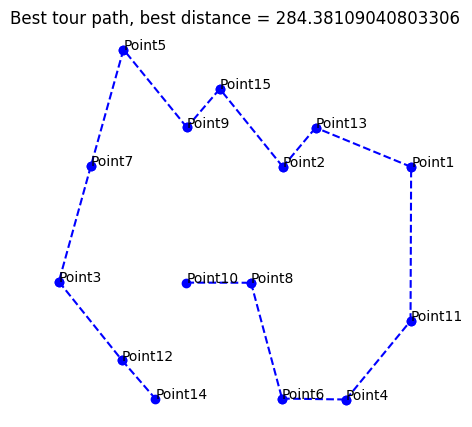

In [25]:
plot_tour(best_path, best_distance)